In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw(x1,x2):
    ln = plt.plot(x1,x2)
    
def sigmoid(score):
    return 1/(1+np.exp(-score))

def calculate_error(line_parameter, points, y): # calculating total erros using cross entropy
    m = y.shape[0]
    p = sigmoid(points*line_parameter)
    cross_entropy = (-1/m)*(np.log(p).T*y + np.log(1-p).T*(1-y))
    return cross_entropy

def gradient_descent(line_parameter, points, y): # to minimize the errors
    alpha = 0.6 # <-- alpha is the learning rate
    m = y.shape[0]
    for i in range(2000):
        p = sigmoid(points*line_parameter)
        gradient = (points.T*(p - y))*(1/m)*alpha # <-- this formula is given for calculating delta E
        line_parameter = line_parameter - gradient 
        w1 = line_parameter.item(0)
        w2 = line_parameter.item(1)
        b = line_parameter.item(2)
        x1 = np.array([points[:,0].min(), points[:,0].max()])
        x2 = (-b - x1*w1)/w2  
    draw(x1,x2)
        
        
        

In [3]:
n_pts = 100
bias = np.ones(n_pts)
np.random.seed(0) #to get same random numbers everytime
top_region = np.array([np.random.normal(10,2,n_pts),np.random.normal(12,2,n_pts), bias]).T
bottom_region = np.array([np.random.normal(5,2,n_pts),np.random.normal(6,2,n_pts), bias]).T
all_points = np.vstack((top_region,bottom_region))
line_parameter = np.matrix([np.zeros(3)]).T
y = np.array([np.zeros(n_pts),np.ones(n_pts)]).reshape(n_pts*2,1)

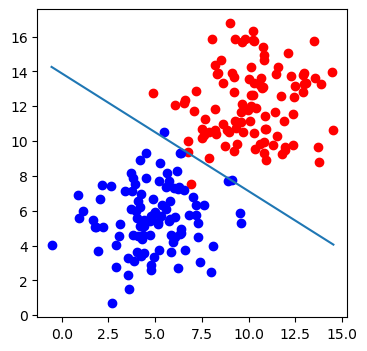

In [4]:
_,ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0],top_region[:,1], color = 'r')
ax.scatter(bottom_region[:,0],bottom_region[:,1], color = 'b')
gradient_descent(line_parameter, all_points, y)
plt.show()

In [5]:
print(calculate_error(line_parameter, all_points, y))

[[0.69314718]]
